In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
# I will be looking at the three election periods - 2017, 2019, 2024 

#2017 UK General Election:
#Winner: Conservative Party (minority government)
#Top three parties and seats:
 #Conservative Party: 317 seats
 #Labour Party: 262 seats
 #Scottish National Party (SNP): 35 seats

#2019 UK General Election:
#Winner: Conservative Party (majority government)
#Top three parties and seats:
 #Conservative Party: 365 seats
 #Labour Party: 203 seats
 #Scottish National Party (SNP): 48 seats
    
#2024 UK General Election:   
#Winner: Labour Party (majority government)
#Top three parties and seats:
 #Labour Party: 412 seats
 #Conservative Party: 121 seats
 #Liberal Democrats: 72 seats
    
    

In [3]:
uk_election = pd.read_csv('results - results.csv')

In [6]:
uk_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14734 entries, 0 to 14733
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ECRef                14734 non-null  object 
 1   RegulatedEntityName  14734 non-null  object 
 2   RegulatedEntityType  14734 non-null  object 
 3   Value                14734 non-null  object 
 4   AccountingUnitName   12873 non-null  object 
 5   DonorName            14730 non-null  object 
 6   DonorStatus          14734 non-null  object 
 7   DonationType         14734 non-null  object 
 8   NatureOfDonation     2015 non-null   object 
 9   DonationAction       89 non-null     object 
 10  ReceivedDate         14204 non-null  object 
 11  RegisterName         14734 non-null  object 
 12  Donations            14734 non-null  float64
dtypes: float64(1), object(12)
memory usage: 1.5+ MB


In [8]:
#In order to work out basic statistical calculations, 
#I had to create a new column named 'Donations' which was a float data type


uk_election['Donations'] = (uk_election['Value'].str.replace('£', '', regex=False).str.replace(',', '', regex=False).astype(float))

In [10]:
uk_election.DonorName.astype(str)
uk_election.DonorStatus.astype(str)
uk_election.DonationType.astype(str)

0        Impermissible Donor
1                       Cash
2                       Cash
3                       Cash
4                       Cash
                ...         
14729                   Cash
14730                   Cash
14731                   Cash
14732                   Cash
14733                   Cash
Name: DonationType, Length: 14734, dtype: object

In [11]:
uk_election['ReceivedDate'] = pd.to_datetime(uk_election['ReceivedDate'], format='%d/%m/%Y')

In [12]:
uk_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14734 entries, 0 to 14733
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ECRef                14734 non-null  object        
 1   RegulatedEntityName  14734 non-null  object        
 2   RegulatedEntityType  14734 non-null  object        
 3   Value                14734 non-null  object        
 4   AccountingUnitName   12873 non-null  object        
 5   DonorName            14730 non-null  object        
 6   DonorStatus          14734 non-null  object        
 7   DonationType         14734 non-null  object        
 8   NatureOfDonation     2015 non-null   object        
 9   DonationAction       89 non-null     object        
 10  ReceivedDate         14204 non-null  datetime64[ns]
 11  RegisterName         14734 non-null  object        
 12  Donations            14734 non-null  float64       
dtypes: datetime64[ns](1), float64(1

In [13]:
#I removed the 'Value' column since it served no purpose.
uk_election.drop('Value', axis=1, inplace=True)

In [14]:
#I designated dates leading up to the three elections, using intervals of 4 quarters for each election period.

uk_election_2017 = uk_election[(uk_election.ReceivedDate >= '2016-01-01') & (uk_election['ReceivedDate'] < '2017-08-08')]
uk_election_2019 = uk_election[(uk_election.ReceivedDate >= '2019-01-01') & (uk_election['ReceivedDate'] < '2020-01-01')]
uk_election_2024 = uk_election[(uk_election.ReceivedDate >= '2023-01-01') & (uk_election['ReceivedDate'] < '2024-08-08')]

In [15]:
#4 selected Parties 

# List of specific parties
parties = [
    'Labour Party',
    'Conservative and Unionist Party',
    'Liberal Democrats',
    'Scottish National Party (SNP)']

# Filter for the 4 parties
uk_election_2017_top_4 = uk_election_2017[uk_election_2017['RegulatedEntityName'].isin(parties)]
uk_election_2019_top_4 = uk_election_2019[uk_election_2019['RegulatedEntityName'].isin(parties)]
uk_election_2024_top_4 = uk_election_2024[uk_election_2024['RegulatedEntityName'].isin(parties)]




In [16]:
uk_election_2017_top_4.head()

,ECRef,RegulatedEntityName,RegulatedEntityType,AccountingUnitName,DonorName,DonorStatus,DonationType,NatureOfDonation,DonationAction,ReceivedDate,RegisterName,Donations
1,C0319699,Labour Party,Political Party,Central Party,UNISON,Trade Union,Cash,NaN,NaN,2017-05-24,Great Britain,30000.0
9,C0319865,Conservative and Unionist Party,Political Party,Central Party,Investors in Private Capital Ltd,Company,Cash,NaN,NaN,2017-05-31,Great Britain,25000.0
13,C0319670,Labour Party,Political Party,Central Party,Mr Joel Samuels,Individual,Cash,NaN,NaN,2017-05-21,Great Britain,14999.0
15,C0319358,Labour Party,Political Party,Central Party,GMB,Trade Union,Cash,NaN,NaN,2017-05-05,Great Britain,10000.0
16,C0320019,Conservative and Unionist Party,Political Party,Central Party,Mr Constantine Logothetis,Individual,Cash,NaN,NaN,2017-06-08,Great Britain,25000.0


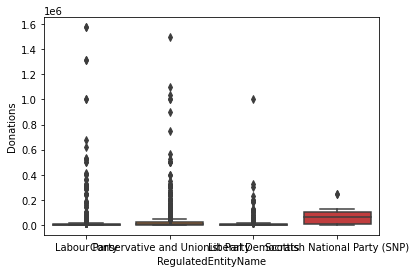

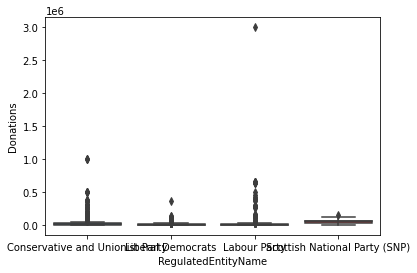

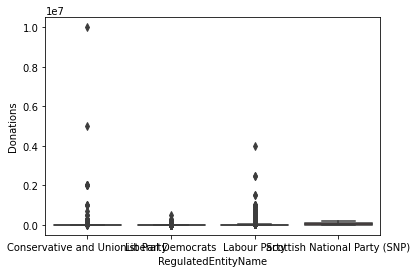

<Figure size 432x288 with 0 Axes>

In [17]:
#I created a boxplot to compare the four parties' average amount of donations. 
#However, having created it, there is not much inference you can draw from it. 
#Except that the amount donated to each party varies significantly and the amounts are significant.

sns.boxplot(data = uk_election_2017_top_4, x='RegulatedEntityName', y = 'Donations')
plt.show()
plt.clf()


sns.boxplot(data = uk_election_2019_top_4, x='RegulatedEntityName', y = 'Donations')
plt.show()
plt.clf()

sns.boxplot(data = uk_election_2024_top_4, x='RegulatedEntityName', y = 'Donations')
plt.show()
plt.clf()

In [18]:
#"I created a table to understand which type of donor contributed the most to each party. 
#It's interesting to see that there was a significant drop in Conservative individual donations in the 2024 election (the one in which they lost) 
#and there was a significant increase in Labour donations from companies in the very same election. 
#Also, Trade Unions exclusively donate to Labour - 
#and that significantly makes up for the individual contributions that Conservatives have over them."

#2017
Donation_DonorStatus_2017 = pd.crosstab(uk_election_2017_top_4.RegulatedEntityName,uk_election_2017_top_4.DonorStatus)

Donation_DonorStatus_freq_2017 = (Donation_DonorStatus_2017 / len(uk_election_2017_top_4.DonorStatus)) * 100

#2019
Donation_DonorStatus_2019 = pd.crosstab(uk_election_2019_top_4.RegulatedEntityName,uk_election_2019_top_4.DonorStatus)

Donation_DonorStatus_freq_2019 = (Donation_DonorStatus_2019 / len(uk_election_2019_top_4.DonorStatus)) * 100

#2024

Donation_DonorStatus_2024 = pd.crosstab(uk_election_2024_top_4.RegulatedEntityName,uk_election_2024_top_4.DonorStatus)

Donation_DonorStatus_freq_2024 = (Donation_DonorStatus_2024 / len(uk_election_2017_top_4.DonorStatus)) * 100

In [19]:
Donation_DonorStatus_freq_2017

DonorStatus,Company,Friendly Society,Impermissible Donor,Individual,Limited Liability Partnership,Other,Public Fund,Registered Political Party,Trade Union,Trust,Unidentifiable Donor,Unincorporated Association
RegulatedEntityName,,,,,,,,,,,,
Conservative and Unionist Party,15.435583,0.02454,0.024540,28.711656,0.220859,0.000000,0.147239,0.000000,0.000000,0.441718,0.00000,3.975460
Labour Party,2.331288,0.00000,0.000000,4.368098,0.024540,0.269939,0.122699,1.251534,13.717791,0.000000,0.00000,3.411043
Liberal Democrats,3.680982,0.00000,0.392638,16.417178,0.122699,0.000000,0.736196,0.000000,0.000000,0.171779,0.09816,3.190184
Scottish National Party (SNP),0.024540,0.00000,0.000000,0.343558,0.000000,0.000000,0.343558,0.000000,0.000000,0.000000,0.00000,0.000000


In [20]:
Donation_DonorStatus_freq_2019

DonorStatus,Company,Friendly Society,Impermissible Donor,Individual,Limited Liability Partnership,Other,Public Fund,Registered Political Party,Trade Union,Trust,Unincorporated Association
RegulatedEntityName,,,,,,,,,,,
Conservative and Unionist Party,14.470413,0.00000,0.248633,31.626057,0.049727,0.000000,0.497265,0.000000,0.000000,0.099453,4.375932
Labour Party,1.243163,0.14918,0.000000,2.536052,0.000000,0.596718,0.298359,0.348086,9.149677,0.000000,5.171556
Liberal Democrats,3.679761,0.00000,0.298359,17.652909,0.000000,0.000000,1.342616,0.000000,0.000000,0.198906,4.922924
Scottish National Party (SNP),0.049727,0.00000,0.000000,0.447539,0.000000,0.000000,0.546992,0.000000,0.000000,0.000000,0.000000


In [22]:
Donation_DonorStatus_freq_2024

#Based on the information below, we could infer that the flow of donations gives a strong indicator 
#as to how the election may unfold, i.e., 
#there is an overall favorite amongst society or a tightly contested election.

#However, this probably requires more exploration to understand if there is a strong correlation 
#between donation flows and electoral outcomes

DonorStatus,Company,Friendly Society,Impermissible Donor,Individual,Limited Liability Partnership,Other,Public Fund,Registered Political Party,Trade Union,Trust,Unincorporated Association
RegulatedEntityName,,,,,,,,,,,
Conservative and Unionist Party,13.987730,0.00000,0.368098,25.006135,0.000000,0.07362,0.441718,0.122699,0.000000,0.122699,5.202454
Labour Party,5.055215,0.07362,0.000000,10.920245,0.809816,0.04908,0.613497,0.736196,9.006135,0.024540,3.116564
Liberal Democrats,5.030675,0.00000,0.196319,27.214724,0.024540,0.00000,1.006135,0.000000,0.000000,0.368098,8.220859
Scottish National Party (SNP),0.098160,0.00000,0.000000,0.343558,0.000000,0.00000,0.343558,0.000000,0.000000,0.000000,0.000000


In [25]:
#2024 - 

Donor_Total_2024 = uk_election_2024_top_4.groupby(['DonorStatus', 'RegulatedEntityName'])['Donations'].sum().reset_index()
Donor_Total_2024_p = Donor_Total_2024.pivot(index='RegulatedEntityName', columns='DonorStatus', values='Donations').reset_index()

In [26]:
#2017 

Donor_Total_2017 = uk_election_2017_top_4.groupby(['DonorStatus', 'RegulatedEntityName'])['Donations'].sum().reset_index()
Donor_Total_2017_p = Donor_Total_2017.pivot(index='RegulatedEntityName', columns='DonorStatus', values='Donations').reset_index()

In [27]:
#2019


Donor_Total_2019 = uk_election_2019_top_4.groupby(['DonorStatus', 'RegulatedEntityName'])['Donations'].sum().reset_index()
Donor_Total_2019_p = Donor_Total_2019.pivot(index='RegulatedEntityName', columns='DonorStatus', values='Donations').reset_index()

In [28]:
Donor_Total_2017_p

DonorStatus,RegulatedEntityName,Company,Friendly Society,Impermissible Donor,Individual,Limited Liability Partnership,Other,Public Fund,Registered Political Party,Trade Union,Trust,Unidentifiable Donor,Unincorporated Association
0,Conservative and Unionist Party,13983749.87,5000.0,1000.00,33839958.54,111370.40,NaN,580048.91,NaN,NaN,80090.68,NaN,1473183.60
1,Labour Party,641139.30,NaN,NaN,1552511.95,5000.00,5434768.81,911189.24,92539.0,17114985.38,NaN,NaN,737979.64
2,Liberal Democrats,1752090.06,NaN,31177.04,6876965.05,82908.23,NaN,1318097.23,NaN,NaN,27450.00,5000.0,393608.43
3,Scottish National Party (SNP),2080.00,NaN,NaN,674385.00,NaN,NaN,1234912.87,NaN,NaN,NaN,NaN,NaN


In [29]:
Donor_Total_2019_p

DonorStatus,RegulatedEntityName,Company,Friendly Society,Impermissible Donor,Individual,Limited Liability Partnership,Other,Public Fund,Registered Political Party,Trade Union,Trust,Unincorporated Association
0,Conservative and Unionist Party,9456354.49,NaN,9750.4,23225644.89,20000.0,NaN,557491.80,NaN,NaN,11000.0,941415.34
1,Labour Party,295369.53,8700.0,NaN,466138.93,NaN,6123921.64,1000727.99,25370.0,11178603.55,NaN,380041.38
2,Liberal Democrats,992951.79,NaN,128850.0,4876508.23,NaN,NaN,1234401.59,NaN,NaN,40335.0,328811.97
3,Scottish National Party (SNP),10000.00,NaN,NaN,363914.18,NaN,NaN,803280.53,NaN,NaN,NaN,NaN


In [30]:
Donor_Total_2024_p

#This table provides the total amount donated by each donor type. 
#It gives absolute numbers to complement the percentage form shown above. 
#We can see the significant jump in company donations that Labour had in 2024 relative to 2019.

DonorStatus,RegulatedEntityName,Company,Friendly Society,Impermissible Donor,Individual,Limited Liability Partnership,Other,Public Fund,Registered Political Party,Trade Union,Trust,Unincorporated Association
0,Conservative and Unionist Party,22874607.33,NaN,60750.0,26801417.67,NaN,7561.92,843336.12,84487.79,NaN,15000.00,2612306.99
1,Labour Party,13561247.71,10400.0,NaN,25532688.14,702232.12,23750.00,10676308.51,59195.00,12388764.73,3881.42,537843.22
2,Liberal Democrats,3398573.84,NaN,18150.0,8732286.82,3000.00,NaN,2153897.10,NaN,NaN,324048.30,699048.77
3,Scottish National Party (SNP),10400.00,NaN,NaN,457752.28,NaN,NaN,1464264.23,NaN,NaN,NaN,NaN
